In [2]:
import pandas as pd

In [23]:
colTask = ['create_timestamp', 'modify_timestamp', 'job_id', 'task_id', 'instance_num', 'status', 
           'plan_cpu', 'plan_mem']

colInstance = ['start_timestamp', 'end_timestamp', 'job_id', 'task_id', 'machineID', 'status', 'seq_no', 
               'total_seq_no', 'real_cpu_max', 'real_cpu_avg', 'real_mem_max', 'real_mem_avg']



batchTask = pd.read_csv('batch_task.csv', names=colTask, header=None)
batchInstance = pd.read_csv('batch_instance.csv', names=colInstance, header=None)


# print(batchInstance['task_id'].value_counts())

#print(batchInstance.groupby('task_id')['real_cpu_max'].max())
print(batchInstance)
print(batchTask)

          start_timestamp  end_timestamp   job_id  task_id  machineID  \
0                   41562          41618    120.0    686.0      299.0   
1                   41561          41619    120.0    686.0     1279.0   
2                   41562          41617    120.0    686.0      828.0   
3                   41561          41617    120.0    686.0       95.0   
4                   41557          41610    120.0    686.0      545.0   
5                   41557          41614    120.0    686.0      258.0   
6                   41558          41614    120.0    686.0      495.0   
7                   41560          41619    120.0    686.0      831.0   
8                   41561          41616    120.0    686.0     1169.0   
9                   41561          41616    120.0    686.0      678.0   
10                  41559          41618    120.0    686.0      350.0   
11                  41557          41619    120.0    686.0      577.0   
12                  41560          41613    120.0  

In [4]:
print(batchInstance.groupby(
   ('task_id')
).agg(
    {
         'real_cpu_max': [min, max, sum],    # Sum duration per group
         'real_cpu_avg': [min, max, sum],  # get the count of networks
    }
).head())

#print(batchInstance.groupby('task_id')['real_mem_max'].max())


        real_cpu_max                 real_cpu_avg               
                 min   max       sum          min   max      sum
task_id                                                         
1.0             0.92  2.00    277.12         0.72  0.82   219.35
2.0             0.16  3.00  14548.89         0.04  1.04  6025.08
3.0             1.16  1.16      1.16         0.89  0.89     0.89
4.0             0.32  3.00  14578.45         0.04  1.00  5275.70
5.0             1.95  1.95      1.95         1.26  1.26     1.26


In [5]:
instanceTable = batchInstance.groupby(
   ('task_id')
).agg(
    {
         'real_cpu_max': max
  }
)
print(instanceTable.head())

#print(batchInstance.groupby('task_id')['real_mem_max'].max())
# print(batchTask['task_id'])

         real_cpu_max
task_id              
1.0              2.00
2.0              3.00
3.0              1.16
4.0              3.00
5.0              1.95


In [6]:
merge_task_instance = pd.merge(instanceTable,
                 batchTask[['task_id', 'plan_cpu', 'plan_mem']],
                 on='task_id')
print(merge_task_instance.head())

   task_id  real_cpu_max  plan_cpu  plan_mem
0      1.0          2.00     100.0  0.005405
1      2.0          3.00      50.0  0.007947
2      3.0          1.16      50.0  0.004385
3      4.0          3.00      50.0  0.007957
4      5.0          1.95      50.0  0.004395


In [7]:
#Grouped by plan_cpu and the maximum of real_cpu_max among all the task_ids
#having same plan_cpu value

result= merge_task_instance.groupby(['plan_cpu'],as_index=False).max() 
result

,plan_cpu,task_id,real_cpu_max,plan_mem
0,40.0,71143.0,12.33,0.016007
1,50.0,80553.0,31.00,0.127332
2,55.0,66608.0,14.00,0.021308
3,60.0,66615.0,8.11,0.021308
4,65.0,75434.0,15.00,0.021308
5,70.0,75435.0,8.11,0.021308
6,75.0,75437.0,14.00,0.021308
7,100.0,80415.0,18.00,0.074320
8,200.0,70711.0,3.00,0.026609
9,300.0,69625.0,6.28,0.010706


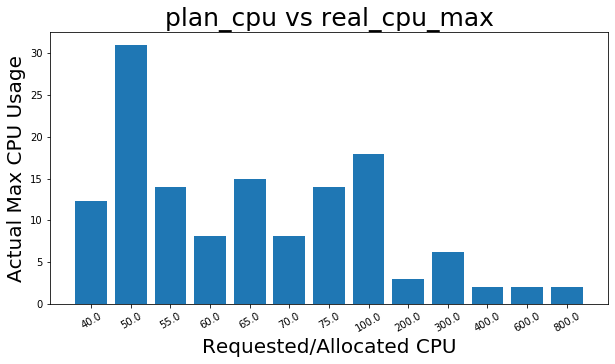

In [87]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,5))
x=result['plan_cpu']
y=result['real_cpu_max']

index=np.arange(len(x))
# plt.plot(x,y)
plt.bar(index,y,width=0.8)

plt.xlabel('Requested/Allocated CPU',fontsize=20)
plt.ylabel('Actual Max CPU Usage',fontsize=20)
plt.xticks(index,x,fontsize=10,rotation=30)
plt.yticks(fontsize=10)

plt.title("plan_cpu vs real_cpu_max",fontsize=25)

plt.show()

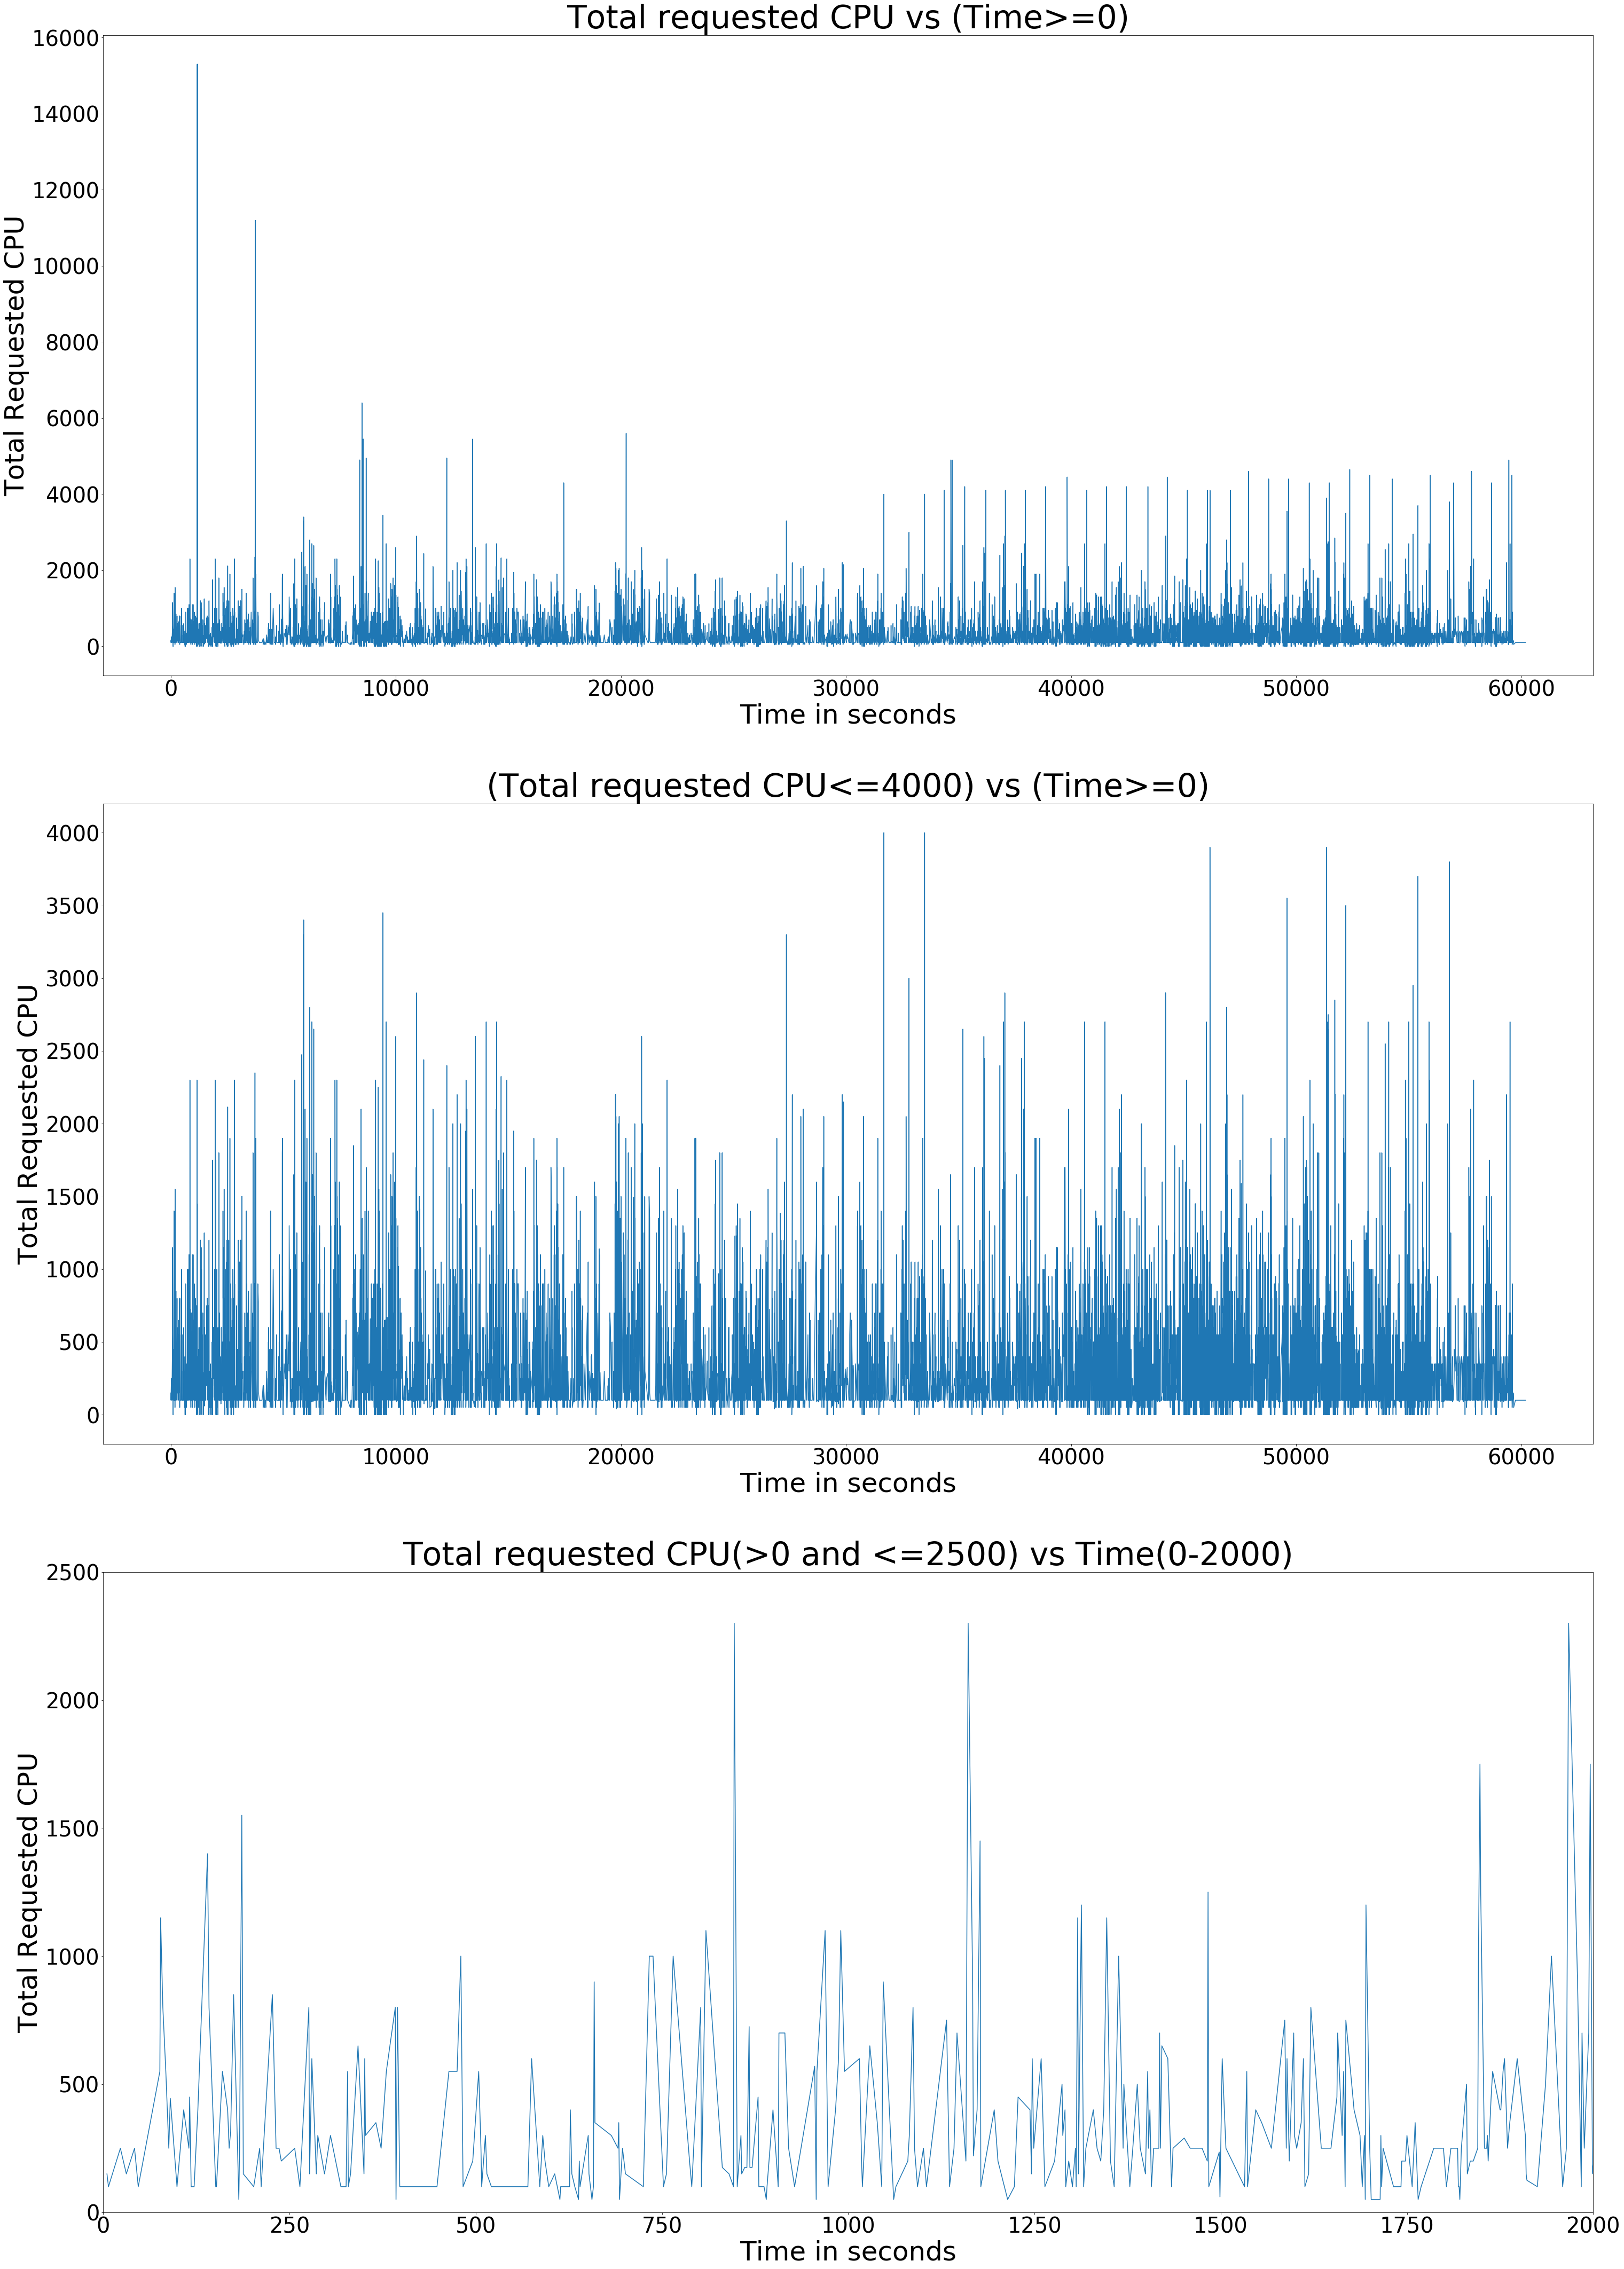

In [113]:
plt.figure(figsize=(50,75))

timeVsplanCpu_ofTask=batchTask.groupby(['create_timestamp'],as_index=False).sum()

#removing negative values
timeVsplanCpu_ofTask=timeVsplanCpu_ofTask[timeVsplanCpu_ofTask.create_timestamp>=0] 
x=timeVsplanCpu_ofTask['create_timestamp']
y=timeVsplanCpu_ofTask['plan_cpu']
plt.subplot(311)
plt.xlabel('Time in seconds',fontsize=50)
plt.ylabel('Total Requested CPU',fontsize=50)
# plt.xticks(index,x,fontsize=10,rotation=30)
plt.yticks(fontsize=40)
plt.xticks(fontsize=40)
plt.title("Total requested CPU vs (Time>=0)",fontsize=60)
plt.plot(x,y)

#removing plan_cpu values>4000
timeVsplanCpu_ofTask=timeVsplanCpu_ofTask[timeVsplanCpu_ofTask.plan_cpu<=4000]
x=timeVsplanCpu_ofTask['create_timestamp']
y=timeVsplanCpu_ofTask['plan_cpu']
plt.subplot(312)
plt.xlabel('Time in seconds',fontsize=50)
plt.ylabel('Total Requested CPU',fontsize=50)
# plt.xticks(index,x,fontsize=10,rotation=30)
plt.yticks(fontsize=40)
plt.xticks(fontsize=40)
plt.title("(Total requested CPU<=4000) vs (Time>=0)",fontsize=60)
plt.plot(x,y)

#removing plan_cpu values==0
timeVsplanCpu_ofTask=timeVsplanCpu_ofTask[timeVsplanCpu_ofTask.plan_cpu>0]
# print(timeVsplanCpu_ofTask)
x=timeVsplanCpu_ofTask['create_timestamp']
y=timeVsplanCpu_ofTask['plan_cpu']
plt.subplot(313)
plt.axis([0,2000,0,2500])
plt.xlabel('Time in seconds',fontsize=50)
plt.ylabel('Total Requested CPU',fontsize=50)
# plt.xticks(index,x,fontsize=10,rotation=30)
plt.yticks(fontsize=40)
plt.xticks(fontsize=40)
plt.title("Total requested CPU(>0 and <=2500) vs Time(0-2000)",fontsize=60)
plt.plot(x,y)

plt.show()